In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
play_store = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Google_play/googleplaystore.csv")
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
play_store.shape

(10841, 13)

In [6]:
play_store.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
play_store.values

array([['Photo Editor & Candy Camera & Grid & ScrapBook',
        'ART_AND_DESIGN', 4.1, ..., 'January 7, 2018', '1.0.0',
        '4.0.3 and up'],
       ['Coloring book moana', 'ART_AND_DESIGN', 3.9, ...,
        'January 15, 2018', '2.0.0', '4.0.3 and up'],
       ['U Launcher Lite – FREE Live Cool Themes, Hide Apps',
        'ART_AND_DESIGN', 4.7, ..., 'August 1, 2018', '1.2.4',
        '4.0.3 and up'],
       ...,
       ['Parkinson Exercices FR', 'MEDICAL', nan, ...,
        'January 20, 2017', '1.0', '2.2 and up'],
       ['The SCP Foundation DB fr nn5n', 'BOOKS_AND_REFERENCE', 4.5, ...,
        'January 19, 2015', 'Varies with device', 'Varies with device'],
       ['iHoroscope - 2018 Daily Horoscope & Astrology', 'LIFESTYLE',
        4.5, ..., 'July 25, 2018', 'Varies with device',
        'Varies with device']], dtype=object)

In [8]:
play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
# this code modify installs column is str to int.

to_list = list(play_store["Installs"])
list_new = []
for number in to_list:
    number = number.replace(",", "").replace("+", "").replace("Free", "0")
    list_new.append(int(number))
    
categories_modf = np.array(list_new)

In [10]:
play_store["Installs"] = categories_modf

In [12]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


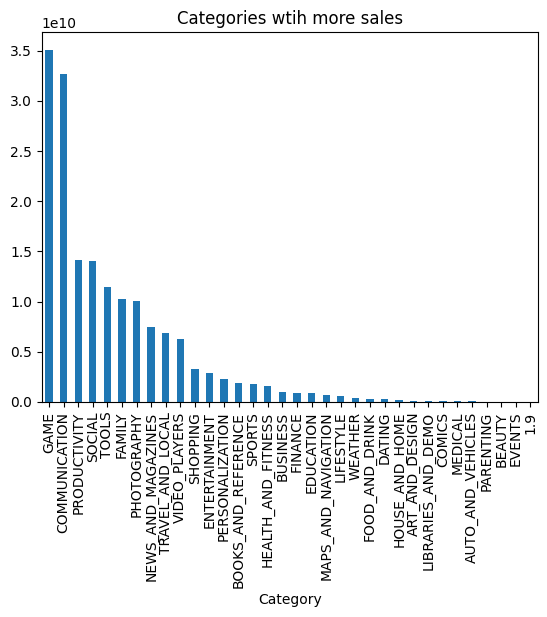

In [11]:
play_store_work = play_store[["Category", "App", "Size", "Type", "Installs"]]
play_store_cat = play_store_work.groupby("Category")["Installs"].sum().sort_values(ascending=False).plot(kind="bar", title="Categories wtih more sales")


In [13]:
play_store_set = play_store_work.set_index(["Category", "Type"])
play_store_set

App  \
Category            Type                                                      
ART_AND_DESIGN      Free     Photo Editor & Candy Camera & Grid & ScrapBook   
                    Free                                Coloring book moana   
                    Free  U Launcher Lite – FREE Live Cool Themes, Hide ...   
                    Free                              Sketch - Draw & Paint   
                    Free              Pixel Draw - Number Art Coloring Book   
...                                                                     ...   
FAMILY              Free                                   Sya9a Maroc - FR   
                    Free                   Fr. Mike Schmitz Audio Teachings   
MEDICAL             Free                             Parkinson Exercices FR   
BOOKS_AND_REFERENCE Free                      The SCP Foundation DB fr nn5n   
LIFESTYLE           Free      iHoroscope - 2018 Daily Horoscope & Astrology   

                                        Size  Installs  
Category            Type                                
ART_AND_DESIGN      Free                 19M     10000  
                    Free                 14M    500000  
                    Free                8.7M   5000000  
                    Free                 25M  50000000  
                    Free                2.8M    100000  
...                                      ...       ...  
FAMILY              Free                 53M      5000  
                    Free                3.6M       100  
MEDICAL             Free                9.5M      1000  
BOOKS_AND_REFERENCE Free  Varies with device      1000  
LIFESTYLE           Free                 19M  10000000  

[10841 rows x 3 columns]

In [14]:
play_store_work["Installs"] > 50000000

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Name: Installs, Length: 10841, dtype: bool

In [15]:
play_store_work[play_store_work["Installs"] > 50000000]

,Category,App,Size,Type,Installs
139,BOOKS_AND_REFERENCE,Wattpad 📖 Free Books,Varies with device,Free,100000000
143,BOOKS_AND_REFERENCE,Amazon Kindle,Varies with device,Free,100000000
152,BOOKS_AND_REFERENCE,Google Play Books,Varies with device,Free,1000000000
194,BUSINESS,OfficeSuite : Free Office + PDF Editor,35M,Free,100000000
293,BUSINESS,OfficeSuite : Free Office + PDF Editor,35M,Free,100000000
...,...,...,...,...,...
10186,FAMILY,Farm Heroes Saga,71M,Free,100000000
10253,BUSINESS,File Commander - File Manager/Explorer,12M,Free,100000000
10327,GAME,Garena Free Fire,53M,Free,100000000
10647,VIDEO_PLAYERS,Motorola FM Radio,Varies with device,Free,100000000


In [16]:
play_store_work[play_store_work["App"] == "OfficeSuite : Free Office + PDF Editor"]

,Category,App,Size,Type,Installs
194,BUSINESS,OfficeSuite : Free Office + PDF Editor,35M,Free,100000000
293,BUSINESS,OfficeSuite : Free Office + PDF Editor,35M,Free,100000000


In [17]:
# subsetting using isin()
is_app = play_store_work["App"].isin(["Farm Heroes Saga", "Garena Free Fire" ])
play_store_work[is_app]

,Category,App,Size,Type,Installs
1695,GAME,Farm Heroes Saga,70M,Free,100000000
1718,GAME,Garena Free Fire,53M,Free,100000000
1733,GAME,Farm Heroes Saga,70M,Free,100000000
1880,GAME,Farm Heroes Saga,70M,Free,100000000
1915,GAME,Garena Free Fire,53M,Free,100000000
1949,GAME,Garena Free Fire,53M,Free,100000000
2011,GAME,Farm Heroes Saga,70M,Free,100000000
10186,FAMILY,Farm Heroes Saga,71M,Free,100000000
10327,GAME,Garena Free Fire,53M,Free,100000000


In [18]:
#Dropping duplicate names
play_store_del = play_store_work
play_store_del.drop_duplicates(subset="App")

,Category,App,Size,Type,Installs
0,ART_AND_DESIGN,Photo Editor & Candy Camera & Grid & ScrapBook,19M,Free,10000
1,ART_AND_DESIGN,Coloring book moana,14M,Free,500000
2,ART_AND_DESIGN,"U Launcher Lite – FREE Live Cool Themes, Hide ...",8.7M,Free,5000000
3,ART_AND_DESIGN,Sketch - Draw & Paint,25M,Free,50000000
4,ART_AND_DESIGN,Pixel Draw - Number Art Coloring Book,2.8M,Free,100000
...,...,...,...,...,...
10836,FAMILY,Sya9a Maroc - FR,53M,Free,5000
10837,FAMILY,Fr. Mike Schmitz Audio Teachings,3.6M,Free,100
10838,MEDICAL,Parkinson Exercices FR,9.5M,Free,1000
10839,BOOKS_AND_REFERENCE,The SCP Foundation DB fr nn5n,Varies with device,Free,1000


In [19]:
play_store_pivot = play_store_work.pivot_table(values="Installs", index="Category")
play_store_pivot

,Installs
Category,
1.9,0.000000e+00
ART_AND_DESIGN,1.912894e+06
AUTO_AND_VEHICLES,6.250613e+05
BEAUTY,5.131519e+05
BOOKS_AND_REFERENCE,8.318050e+06
BUSINESS,2.178076e+06
COMICS,9.347692e+05
COMMUNICATION,8.435989e+07
DATING,1.129533e+06
